Task 1- Stock Prediction

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [48]:
df=pd.read_csv("C:\\Users\\drlgs\\Downloads\\TSLA.csv")

In [49]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-13,223.166672,226.633331,214.683334,215.736664,215.736664,102767400
1,2022-06-14,218.286667,226.330002,211.736664,220.889999,220.889999,97988700
2,2022-06-15,220.916672,235.663330,218.149994,233.000000,233.000000,119131800
3,2022-06-16,222.736664,225.166672,208.693329,213.100006,213.100006,107390700
4,2022-06-17,213.433334,220.970001,213.196671,216.759995,216.759995,92641800
...,...,...,...,...,...,...,...
247,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800
248,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700
249,2023-06-09,249.070007,252.419998,242.020004,244.399994,244.399994,199882300
250,2023-06-12,247.940002,250.970001,244.589996,249.830002,249.830002,150337900


In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-13,223.166672,226.633331,214.683334,215.736664,215.736664,102767400
1,2022-06-14,218.286667,226.330002,211.736664,220.889999,220.889999,97988700
2,2022-06-15,220.916672,235.663330,218.149994,233.000000,233.000000,119131800
3,2022-06-16,222.736664,225.166672,208.693329,213.100006,213.100006,107390700
4,2022-06-17,213.433334,220.970001,213.196671,216.759995,216.759995,92641800


In [51]:
df.shape

(252, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Ploting the closing price of the stock to visualize the Ttrend

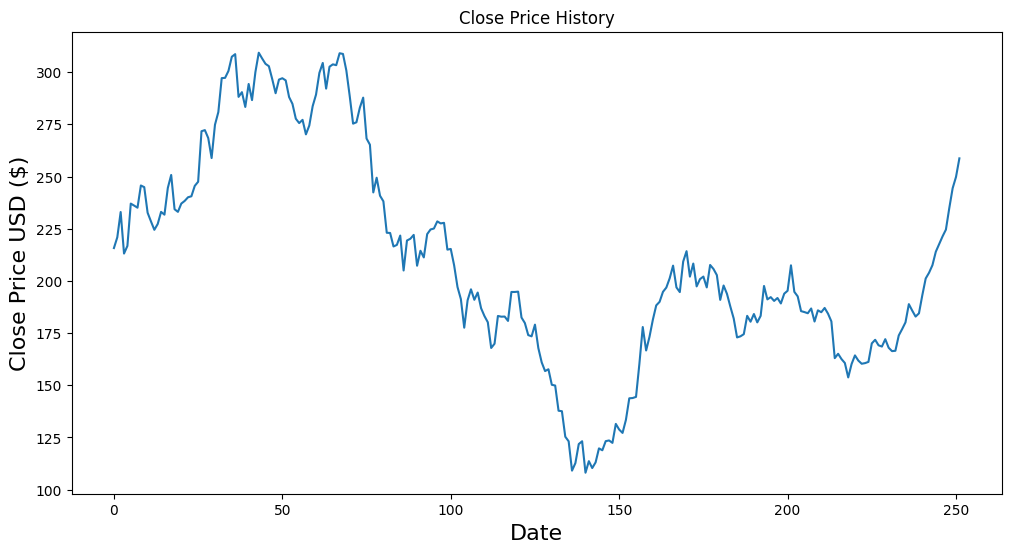

In [53]:
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.show()

Preprocessing the data before feeding it into the LSTM.

In [54]:
data = df.filter(['Close']).values

Normalize the data between 0 and 1 using the MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

Train the Dataset

In [56]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Building the LSTM model

In [57]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 7s 65ms/step - loss: 0.1887
Epoch 2/50
5/5 [==============================] - 0s 58ms/step - loss: 0.0444
Epoch 3/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0240
Epoch 4/50
5/5 [==============================] - 0s 56ms/step - loss: 0.0315
Epoch 5/50
5/5 [==============================] - 0s 78ms/step - loss: 0.0239
Epoch 6/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0227
Epoch 7/50
5/5 [==============================] - 0s 65ms/step - loss: 0.0201
Epoch 8/50
5/5 [==============================] - 0s 68ms/step - loss: 0.0206
Epoch 9/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0199
Epoch 10/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0183
Epoch 11/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0173
Epoch 12/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0156
Epoch 13/50
5/5 [==============================] - 0s 61ms/st

Prediction on the test data

In [58]:
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:]
x_test = []
y_test = data[int(len(data)*0.8):, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 17ms/step


Visualization of Actual vs predicted values 

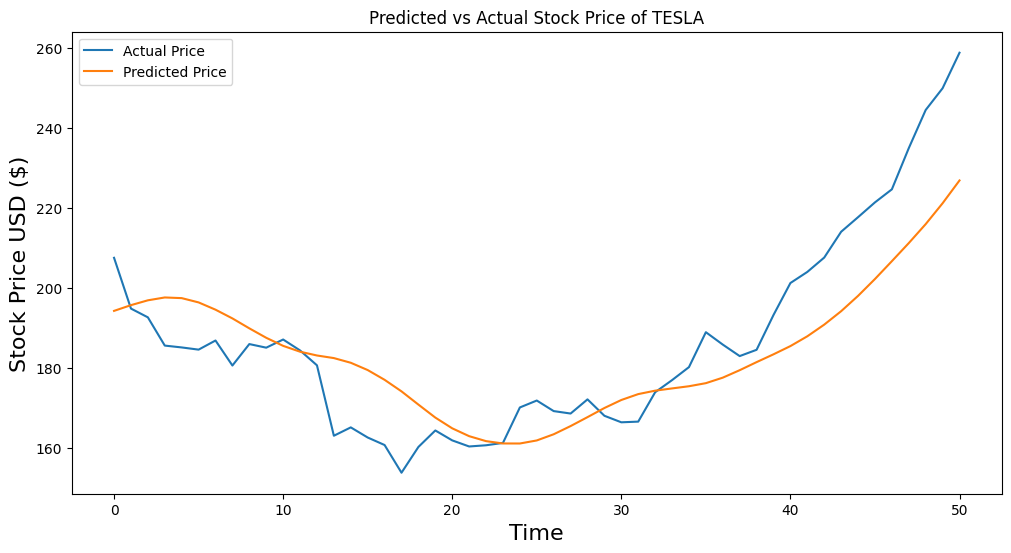

In [59]:
plt.figure(figsize=(12,6))
plt.title('Predicted vs Actual Stock Price of TESLA')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Stock Price USD ($)', fontsize=16)
plt.legend()
plt.show()